In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [2]:
path = '../data/aftershock-region.csv'
data = pd.read_csv(path)
data = data.dropna()
print(data.head)
print(data.columns)

<bound method NDFrame.head of      magnitude  region  region_log
0          7.9   13000    4.113943
1          7.9   12700    4.103804
2          7.9   12600    4.100371
3          7.9   12600    4.100371
4          7.9   12900    4.110590
..         ...     ...         ...
184        5.1      16    1.204120
185        5.1      15    1.176091
186        5.1      15    1.176091
187        5.1      14    1.146128
188        5.1      14    1.146128

[189 rows x 3 columns]>
Index(['magnitude', 'region', 'region_log'], dtype='object')


In [3]:
x = data[['magnitude']]
y = data[['region']]
print(x.shape, y.shape)

(189, 1) (189, 1)


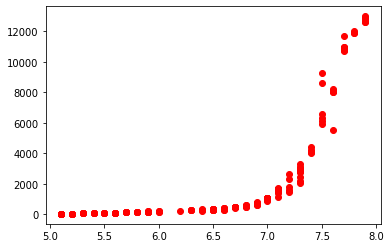

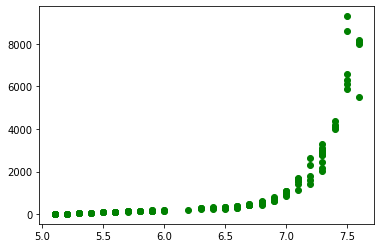

In [4]:
plt.scatter(x,y,c='r')
plt.show()
plt.scatter(x[18:],y[18:],c='g')
plt.show()

In [5]:
X_train,X_test,y_train,y_test = train_test_split(x,y,shuffle=True)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((141, 1), (48, 1), (141, 1), (48, 1))

In [6]:
model = make_pipeline(PolynomialFeatures(degree=8, include_bias=True),LinearRegression())
model.fit(X_train,y_train)
model.steps[1][1].coef_,model.steps[1][1].intercept_

(array([[ 0.00000000e+00,  2.94911009e+09, -1.67174254e+09,
          5.39947867e+08, -1.08678820e+08,  1.39584344e+07,
         -1.11715747e+06,  5.09384125e+04, -1.01304543e+03]]),
 array([-2.26957285e+09]))

In [7]:
y_predict = model.predict(X_test)

X_new = np.linspace(5,7.9,100).reshape(100,1)
y_new = model.predict(X_new)
print("결정계수: ",r2_score(y_test,y_predict))

결정계수:  0.9871966922096373


c:\Users\didhw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


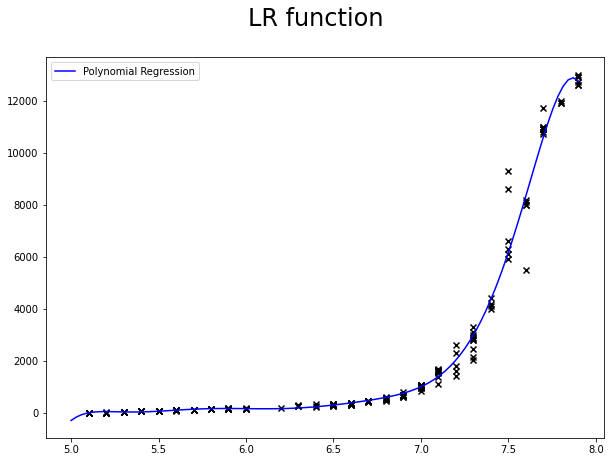

In [9]:
plt.figure(figsize=(10,7))
# plt.scatter(X_test,y_test)
# plt.scatter(X_test,y_predict)
plt.scatter(x,y,c='black',marker='x')
plt.plot(X_new,y_new,c='blue',label='Polynomial Regression')
plt.suptitle("LR function",size=24)
plt.legend()
plt.show()